<a href="https://colab.research.google.com/github/wldopie/ESAA/blob/main/HW_221104.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **8.6 토픽 모델링(Topic Modeling) - 20 뉴스그룹**

  - `토픽 모델링`
    - 문서 집합에 숨어 있는 주제를 찾아내는 것

  - 머신러닝 기반의 토픽 모델링을 적용해 숨어 있는 중요 주제를 효과적으로 찾아낼 수 있다.

  - 머신러닝 기반의 토픽 모델은 숨겨진 `주제를 효과적으로 표현할 수 있는 중심 단어`를 함축적으로 추출한다.

  - 토픽 모델링에 자주 사용되는 기법
    - `LSA`(Latent Semantic Analysis)
    - `LDA`(Latent Dirichlet Allocation)
      - 이 절에서는 LDA만을 이용해 토픽 모델링을 수행

  - 텍스트 분류에서 소개한 20 뉴스그룹 데이터 세트를 이용해 토픽 모델링을 진행한다. 20개의 주제 중 모토사이클, 야구, 그래픽스, 윈도우, 중동, 기독교, 전자공학, 의학의 8개 주제를 추출하고, 이들 텍스트에 LDA 기반의 토픽 모델링을 적용해 본다.

  - 사이킷런은 `LDA 기반의 토픽 모델링`을 `LatentDirichletAllocation` 클래스로 제공한다.

  - 먼저 LDA 토픽 모델링을 위해 fetch_20newsgroups() API는 categories 파라미터를 통해 필요한 주제만 필터링해 추출하고, 추출된 텍스트를 Count 기반으로 벡터화 변환한다. LDA는 Count 기반의 벡터화만 사용한다.

  - max_features = 1000으로 word 피처의 개수를 제한하고, ngram_range는 (1,2)로 설정하고 피처 벡터화 변환한다.

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 8개 주제를 추출
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']

# 위에서 cats 변수로 기재된 카테고리만 추출, fetch_20newsgroups()의 categories에 cats 입력
news_df = fetch_20newsgroups(subset = 'all', remove = ('headers', 'footers', 'quotes'),
                             categories = cats, random_state = 0)

# LDA는 Count 기반의 벡터화만 적용
count_vect = CountVectorizer(max_df = 0.95, max_features = 1000, min_df = 2,
                             stop_words = 'english', ngram_range = (1,2))
feat_vect = count_vect.fit_transform(news_df.data)

print('CountVectorizer Shape :', feat_vect.shape)

CountVectorizer Shape : (7862, 1000)


  - CountVectorizer 객체 변수인 feat_vect 모두 7862개의 문서가 1000개의 피처로 구성된 행렬 데이터이다.
  - 이렇게 `피처 벡터화된 데이터 세트`를 기반으로 `LDA 토픽 모델링`을 수행한다.
  - 토픽의 개수는 위와 동일하게 8개로 정하고, LatentDirichletAllocation 클래스의 n_components 파라미터를 이용해 이 토픽 개수를 조정한다.

In [3]:
lda = LatentDirichletAllocation(n_components = 8, random_state = 0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

  - `LatentDirichletAllocation.fit(데이터 세트)`을 수행하면 LatentDirichletAllocation 객체는 `components_` 속성값을 갖는다.
  - `components_`는 개별 토픽별로 각 `word 피처가 얼마나 많이 그 토픽에 할당됐는지`에 대한 수치를 나타낸다.
  - `높은 값일수록` 해당 word 피처는 그 `토픽의 중심 word`가 된다.
  - components_의 형태와 속성값을 확인해 보자.

In [4]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

  - 8개의 토픽별로 1000개의 word 피처가 해당 토픽별로 연관도 값을 갖는다.
  - 즉, components_ array의 0번째 row, 10번째 col에 있는 값은 Topic #0에 대해서 피처 벡터화된 행렬에서 10번째 칼럼에 해당하는 피처가 Topic #0에 연관되는 수치 값을 가지고 있다.
  - `display_topics()` 함수를 만들어 각 `토픽별로 연관도가 높은 순으로 word를 나열`해 보자.

In [5]:
def display_topics(model, feature_names, no_top_words):
  for topic_index, topic in enumerate(model.components_):
    print('Topic #', topic_index)

    # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환
    topic_word_indexes = topic.argsort()[::-1]
    top_indexes = topic_word_indexes[:no_top_words]

    # top_indexes 대상인 인덱스별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
    feature_concat = ' '.join([feature_names[i] for i in top_indexes])
    print(feature_concat)

# ContVectorizer 객체 내의 전체 word의 명칭을 get_features_names()를 통해 추출
feature_names = count_vect.get_feature_names()

# 토픽별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


  - 20 뉴스그룹에서 모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 8개를 주제로 추출했는데, 8개의 토픽으로 모델링이 잘 됐는지 확인해 보자.

---

## **8.8 문서 유사도**

### **a. 문서 유사도 측정 방법 - 코사인 유사도**

  - `코사인 유사도(Cosine Similarity)`
    - 벡터와 벡터 간의 유사도를 비교할 때, 벡터의 크기보다는 `벡터의 상호 방향성이 얼마나 유사한지`에 기반
    - `두 벡터 사이의 사잇각`을 구해서 얼마나 유사한지 수치로 적용한 것

### **b. 두 벡터 사잇각**

  - 두 벡터 사잇각
    - 유사하거나 관련이 없거나 아예 반대 관계가 될 수 있다.
    
    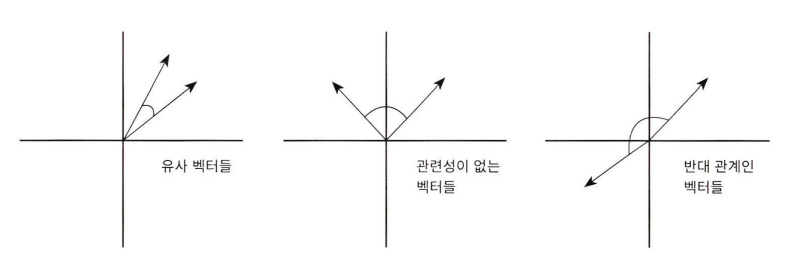

  - 두 벡터 A와 B의 내적 값

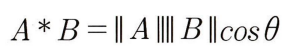

  - 유사도 cosθ

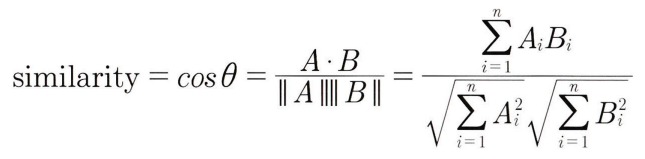

  - `코사인 유사도`가 `문서의 유사도 비교에 가장 많이 사용`되는 이유
    1. 문서를 피처 벡터화 변환하면 차원이 매우 많은 희소 행렬이 되기 쉽다.
      - 이러한 희소 행렬 기반에서 문서와 문서 벡터 간의 크기에 기반한 유사도 지표는 정확도가 떨어지기 쉽다.
    2. 문서가 매우 긴 경우, 단어의 빈도수도 더 많을 것이기 때문에 이러한 빈도수에만 기반해서는 공정한 비교를 할 수 없다.

  - 간단한 문서에 대해 서로 간의 문서 유사도를 코사인 유사도 기반으로 구해보자.

  - 먼저 두 개의 넘파이 배열에 대한 `코사인 유사도`를 구하는 `cos_similarity() 함수`를 작성한다.

In [9]:
import numpy as np

def cos_similarity(v1, v2):
  dot_product = np.dot(v1, v2)
  l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
  similarity = dot_product / l2_norm

  return similarity

  - doc_list로 정의된 3개의 간단한 문서의 유사도를 비교하기 위해 이 문서를 TF-IDF로 벡터화된 행렬로 변환한다.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends',
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)

print(feature_vect_simple.shape)

(3, 18)


  - 반환된 행렬은 희소 행렬이므로, 앞에서 작성한 cos_similarity() 함수의 인자인 array로 만들기 위해 밀집 행렬로 변환한 뒤 다시 각각을 배열로 변환한다.

In [11]:
# TfidfVectorizer로 transform()한 결과는 희소 행렬이므로, 밀집 행렬로 변환
feature_vect_dense = feature_vect_simple.todense()

# 첫 번째 문장과 두 번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

# 첫 번째 문장과 두 번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)

print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402


  - 첫 번째 문장과 두 번재 문장의 코사인 유사도는 0.402이다.
  - 다음으로 첫 번째와 세 번째, 두 번째와 세 번째 문장의 유사도도 각각 측정해보자.

In [13]:
# 첫 번째 문장과 세 번째 문장의 피처 벡터 추출 및 코사인 유사도 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect1, vect3)

print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

# 두 번째 문장과 세 번째 문장의 피처 벡터 추출 및 코사인 유사도 추출
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect2, vect3)

print('문장 2, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.404
문장 2, 문장 3 Cosine 유사도: 0.456


  - 사이킷런은 `코사인 유사도`를 측정하기 위해 `sklearn.metrics.pairwise.cosine_similarity API를 제공`한다.
  - 이번에는 이를 이용해 앞의 예제의 문서 유사도를 측정해 보자.
  - `cosine_similarity()` 함수는 `두 개의 입력 파라미터`를 입력받는다.
    - `첫 번째` 파라미터는 `비교 기준이 되는 문서의 피처 행렬`
    - `두 번째` 파라미터는 `비교되는 문서의 피처 행렬`

  - `cosine_similarity()`는 `희소 행렬`, `밀집 행렬 모두가 가능`하며, `행렬 또는 배열 모두 가능`하다. 따라서 앞에서 만든 cos_similarity() 함수와 같이 `별도의 변환 작업이 필요하지 않다`.

  - 첫 번째 문서와 비교해 바로 자신 문서인 첫 번째 문서, 두 번째 문서, 세 번째 문서의 유사도를 측정해 보자.

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


  - cosine_similarity()는 쌍으로 코사인 유사도 값을 제공한다.
  - 모든 개별 문서에 쌍으로(pair) 코사인 유사도 값을 계산해 보자.

In [16]:
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('Shape :', similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
Shape : (3, 3)


### **c. Opinion Review 데이터 세트를 이용한 문서 유사도 측정**

  - 문서 군집화에서 사용한 Opinion Review 데이터 세트를 이용해 이들 문서 간의 유사도를 측정해보자.

In [20]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = r'/content/drive/MyDrive/topics'
all_files = glob.glob(os.path.join(path, '*.data'))
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                             ngram_range=(1,2), min_df=0.05, max_df=0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


  - 이전 절에서 해당 문서의 군집화는 전자제품, 호텔, 자동차를 주제로 군집화되었다. 
  - 이 중 `호텔을 주제로 군집화된 문서`를 이용해 특정 문서와 `다른 문서 간의 유사도`를 알아보자.
  - 문서를 피처 벡터화해 변환한 데이터를 cosine_similarity()를 이용해 상호 비교해 유사도를 확인해보자.
    - 이를 위해 `호텔을 주제로 군집화된 데이터를 먼저 추출`하고, 이 데이터에 해당하는 `TfidfVectorizer의 데이터를 추출`한다.
    - 즉, document_df에서 먼저 `호텔로 군집화된 문서의 인덱스를 추출`한 다음, 이렇게 추출된 `인덱스를 그대로 이용`해 TfidfVectorizer 객체 변수인 `feature_vect에서 호텔로 군집화된 문서의 피처 벡터를 추출`한다.

In [30]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label = 1인 데이터는 호텔로 군집화된 데이터, DataFrame에서 해당 인덱스를 추출
hotel_indexes = document_df[document_df['cluster_label'] == 1].index
print('호텔로 군집화된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 군집화된 데이터 중 첫 번째 문서를 추출해 파일명 표시
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명', comparison_docname, '와 타 문서 유사도 #####')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출
이를 이용해 호텔로 군집화된 문서 중 첫 번째 문서와 다른 문서 간의 코사인 유사도 측정.'''

similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 군집화된 문서들의 DataFrame Index: Int64Index([3, 9, 10, 12, 15, 16, 18, 21, 27, 31, 33, 35, 39, 42, 44, 49], dtype='int64')
##### 비교 기준 문서명 /content/drive/MyDrive/topics/bathroom_bestwestern_hotel_sfo 와 타 문서 유사도 #####
[[1.         0.32619948 0.51442299 0.1386783  0.05221059 0.06193118
  0.09518068 0.0430688  0.05846178 0.11282857 0.13989623 0.06189595
  0.38038865 0.03638665 0.11742762 0.07049362]]


  - 단순히 숫자로만 표시해서는 직관적으로 문서가 어느 정도의 유사도를 가지는지 이해하기 어려울 수 있으므로, 첫 번째 문서와 다른 문서 간에 유사도가 높은 순으로 이를 정렬하고 시각화해 보자.

Text(0.5, 1.0, '/content/drive/MyDrive/topics/bathroom_bestwestern_hotel_sfo')

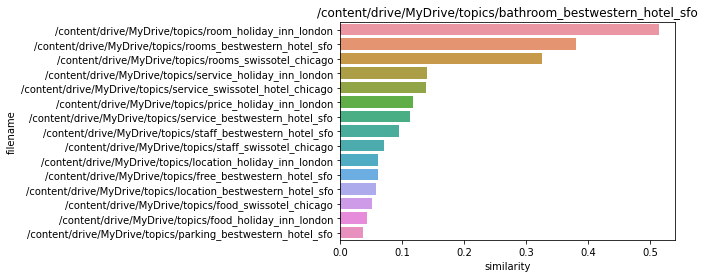

In [31]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 첫 번째 문서와 타 문서 간 유사도가 큰 순으로 정렬한 인덱스를 추출하되, 자기 자신은 제외
sorted_index = similarity_pair.argsort()[:, ::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출해 재정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되, 자기 자신은 제외 
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도 값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x = 'similarity', y = 'filename', data = hotel_1_sim_df)
plt.title(comparison_docname)

  - `bathroom_bestwestern_hotel_sfo`와 가장 `비슷한 문서는 room_holiday_inn_london`이며, 약 `0.572의 코사인 유사도 값`을 나타낸다.

---

## **8.9 한글 텍스트 처리 - 네이버 영화 평점 감성 분석**

### **a. 한글 NLP 처리의 어려움**

  - 일반적으로 `한글 언어 처리`는 '`띄어쓰기`'와 '`다양한 조사`' 때문에 영어 등의 라틴어 처리보다 어렵다.
    - 한글은 띄어쓰기를 잘못하면 의미가 왜곡되어 전달될 수 있어 주의가 필요하다.
    - 조사는 주어나 목적어를 위해 추가되는데, 워낙 경우의 수가 많아 어근 추출(Stemming/Lemmatization) 등의 전처리 시 제거하기가 까다롭다.

### **b. KoNLPy 소개**

  - KoNLPy
    - 파이썬의 대표적인 한글 형태소 패키지
    - 형태소
      - 단어로서 의미를 가지는 최소 단위
    - 형태소 분석(Morphological analysis)
      - 말뭉치를 이러한 형태소 어근 단위로 쪼개고 각 형태소에 품사 태깅(POS tagging)을 부착하는 작업

### **c. 데이터 로딩**

In [35]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 32.9 MB/s eta 0:00:00


In [36]:
import pandas as pd

train_df = pd.read_csv('ratings_train.txt', sep = '\t')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


  - 학습 데이터 세트의 0과 1의 Label 값 비율을 살펴보자.
  - 1이 긍정, 0이 부정 감성이다.

In [37]:
train_df['label'].value_counts()

0    75173
1    74827
Name: label, dtype: int64

  - 0과 1의 비율이 한쪽으로 치우치지 않고 균등하다.
  - train_df의 경우 리뷰 텍스트를 가지는 document 칼럼에 Null이 일부 존재하므로 이 값은 공백으로 변환한다.
  - 문자가 아닌 숫자의 경우, 단어적인 의미로 부족하므로 파이썬의 정규 표현식 모듈인 re를 이용해 이 역시 공백으로 변환한다.
  - 테스트 데이터 세트의 경우도 파일을 로딩하고 동일한 데이터 가공을 수행한다.

In [38]:
import re

train_df = train_df.fillna(' ')
# 정규 표현식을 이용해 숫자를 공백으로 변경 (정규 표현식으로 \d는 숫자를 의미)
train_df['document'] = train_df['document'].apply(lambda x : re.sub(r'\d+', ' ', x))

# 테스트 데이터 세트를 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('ratings_test.txt', sep = '\t')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply(lambda x : re.sub(r'\d+', ' ', x))

# id 칼럼 삭제 수행
train_df.drop('id', axis = 1, inplace = True)
test_df.drop('id', axis = 1, inplace = True)

  - 이제 TF-IDF 방식으로 단어를 벡터화할 텐데, 먼저 각 문장을 `한글 형태소 분석`을 통해 `형태소 단어로 토큰화`한다.
  - `한글 형태소 엔진`은 SNS 분석에 적합한 `Twitter 클래스`를 이용한다.
  - `Twitter` 객체의 `morphs() 메서드`를 이용하면 입력 인자로 들어온 `문장을 형태소 단어 형태로 토큰화`해 list 객체로 반환한다.
  - `문장을 형태소 단어 형태로 반환`하는 별도의 tokenizer 함수를 `tw_tokenizer()`라는 이름으로 생성한다.

In [39]:
from konlpy.tag import Twitter

twitter = Twitter()
def tw_tokenizer(text):
  # 입력 인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 형태로 반환
  tokens_ko = twitter.morphs(text)
  return tokens_ko

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


  - 사이킷런의 TfidfVectorizer를 이용해 TF-IDF 피처 모델을 생성한다.

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Twitter 객체의 morphs() 객체를 이용한 tokenizer를 이용, ngram_range는 (1, 2)
tfidf_vect = TfidfVectorizer(tokenizer = tw_tokenizer, ngram_range = (1, 2), min_df = 3, max_df = 0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


  - 로지스틱 회귀를 이용해 분류 기반의 감성 분석을 수행한다. 로지스틱 회귀의 하이퍼 파라미터 C의 최적화를 위해 GridSearchCV를 이용한다.

In [41]:
# 로지스틱 회귀를 이용해 감성 분석 분류 수행
lg_clf = LogisticRegression(random_state = 0)

# 파라미터 C 최적화를 위해 GridSearchCV를 이용
params = {'C' : [1, 3.5, 4.5, 5.5, 10]}

grid_cv = GridSearchCV(lg_clf, param_grid = params, cv = 3, scoring = 'accuracy', verbose = -1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])

print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


{'C': 3.5} 0.8593


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


  - C가 3.5일 때 최고 0.8593의 정확도를 보인다. 
  - 이제 테스트 데이터를 이용해 최종 감성 분석 예측을 수행해보자.
  - `테스트 세트를 이용해 예측`할 때는, `학습할 때 적용한 TfidfVectorizer를 그대로 사용`해야 한다. 그래야만 학습 시 설정된 TfidfVectorizer의 피처 개수와 테스트 데이터를 TfidfVectorizer로 변환할 피처 개수가 같아진다.

In [42]:
from sklearn.metrics import accuracy_score

# 학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifier는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도:', accuracy_score(test_df['label'], preds))

Logistic Regression 정확도: 0.86186
